In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [303]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.GaussianNoise(0.5),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.GaussianNoise(0.25),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(10)
])

In [304]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [325]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4402 - accuracy: 0.8338
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4376 - accuracy: 0.8342
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4361 - accuracy: 0.8344
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4315 - accuracy: 0.8368
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4348 - accuracy: 0.8366
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4349 - accuracy: 0.8354
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4323 - accuracy: 0.8361
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4294 - accuracy: 0.8372
Epoch 9/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4281 - accuracy: 0.8356
Epoch 10/10
60

In [326]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3637 - accuracy: 0.8630

Test accuracy: 0.863


In [327]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [328]:
predictions = probability_model.predict(test_images)

In [329]:
predictions[0]

array([2.1305654e-08, 1.5649518e-11, 4.0659584e-10, 4.8931481e-10,
       1.1350008e-10, 7.8584589e-03, 7.0018058e-09, 9.7056277e-02,
       8.8564077e-05, 8.9499670e-01], dtype=float32)

In [330]:
np.argmax(predictions[0])

9

In [331]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

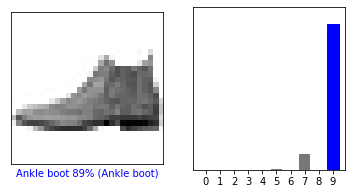

In [332]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

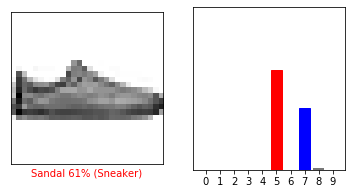

In [333]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

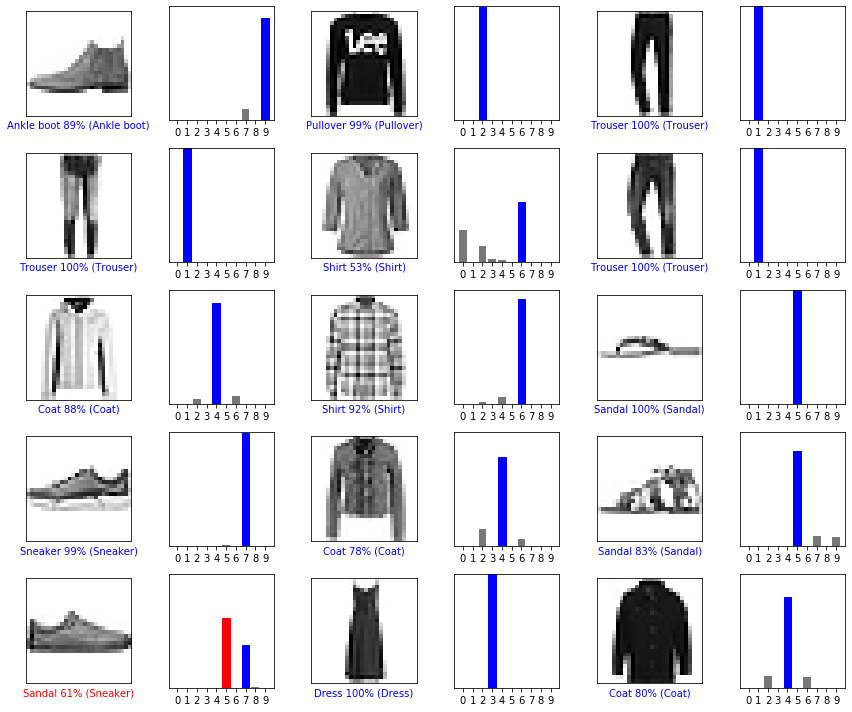

In [334]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [271]:
img = test_images[1]

In [272]:
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.3189153e-04 9.4065875e-08 9.5303279e-01 1.7553903e-05 7.8613432e-03
  2.1607240e-09 3.8717199e-02 2.7703924e-11 3.9213410e-05 6.4642296e-09]]


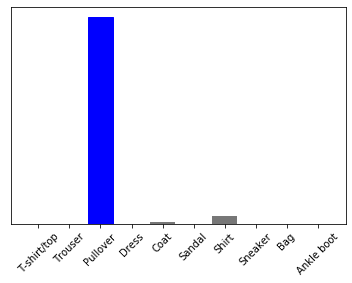

In [273]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [274]:
np.argmax(predictions_single[0])

2